# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `assets/Employee_Movie_Choices.txt`.

A second file, `assets/Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, width=weights);
    else:
        nx.draw_networkx(G, pos,);

### Question 1

Using NetworkX, load in the bipartite graph from `assets/Employee_Movie_Choices.txt` and return that graph.

*This function should return a bipartite networkx graph with 19 nodes and 24 edges*

{'Joan': (1, 0), 'Frida': (1, 1), 'Georgia': (1, 2), 'Vincent': (1, 3), 'Pablo': (1, 4), 'Lee': (1, 5), 'Claude': (1, 6), 'Andy': (1, 7), 'The Godfather': (2, 0), 'Forrest Gump': (2, 1), 'Snakes on a Plane': (2, 2), 'The Social Network': (2, 3), 'The Dark Knight': (2, 4), 'Anaconda': (2, 5), 'The Shawshank Redemption': (2, 6), 'Mean Girls': (2, 7), 'Monty Python and the Holy Grail': (2, 8), 'Kung Fu Panda': (2, 9), 'The Matrix': (2, 10)}


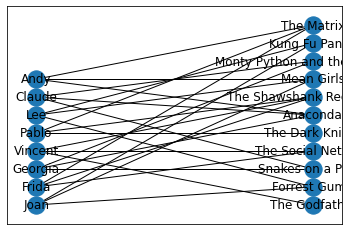

In [40]:
def answer_one():
    # Your Code Here
    #with open('assets/Employee_Movie_Choices.txt') as f:
    #    contents = f.read()
    #print(contents)
    
    B = nx.read_edgelist('assets/Employee_Movie_Choices.txt', delimiter="\t")
    
    #X, Y = bipartite.sets(B) ### separate the two sets
    pos= dict()
    pos.update((n, (1, i)) for i, n in enumerate(employees)) 
    pos.update((n, (2, i)) for i , n in enumerate(movies))
    print(pos)
    #nx.draw(B,  pos = pos)
    nx.draw_networkx(B, pos = pos)
    #plot_graph(B)
    return B # Your Answer Here
answer_one()

{'Joan': (1, 0), 'Frida': (1, 1), 'Georgia': (1, 2), 'Vincent': (1, 3), 'Pablo': (1, 4), 'Lee': (1, 5), 'Claude': (1, 6), 'Andy': (1, 7), 'The Godfather': (2, 0), 'Forrest Gump': (2, 1), 'Snakes on a Plane': (2, 2), 'The Social Network': (2, 3), 'The Dark Knight': (2, 4), 'Anaconda': (2, 5), 'The Shawshank Redemption': (2, 6), 'Mean Girls': (2, 7), 'Monty Python and the Holy Grail': (2, 8), 'Kung Fu Panda': (2, 9), 'The Matrix': (2, 10)}


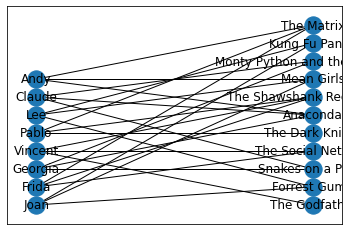

In [8]:
assert type(answer_one()) == nx.Graph , "Your return type should be a Graph object"



### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a bipartite networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [23]:
def answer_two():
    
    # Your Code Here
    B=B = nx.read_edgelist('assets/Employee_Movie_Choices.txt', delimiter="\t")
    pos= dict()
    pos.update((n, (1, i)) for i, n in enumerate(employees)) 
    pos.update((n, (2, i)) for i , n in enumerate(movies))
    
    #X, Y = bipartite.sets(B)
    for n in B.nodes():
        if n in movies:
            B.add_node(n, type='movie')
        elif n in employees:
            B.add_node(n, type='employee')
    #nx.draw_networkx(B,  pos = pos)
    #print(B.nodes(data=True))
    return B# Your Answer Here
answer_two()

In [24]:
assert type(answer_two()) == nx.Graph , "Your return type should be a Graph object"


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [27]:
from networkx.algorithms import bipartite

def answer_three():
    # Your Code Here
    #X, Y =  bipartite.sets(B)
    B=answer_two()
    weighted_proj_B = bipartite.weighted_projected_graph(B, employees)
    #print(weighted_proj_B.edges(data = True))
    
    return weighted_proj_B
answer_three()

EdgeDataView([('Joan', 'Lee', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Frida', 'Vincent', {'weight': 2}), ('Frida', 'Pablo', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Georgia', 'Andy', {'weight': 1}), ('Georgia', 'Claude', {'weight': 3}), ('Vincent', 'Pablo', {'weight': 1}), ('Pablo', 'Andy', {'weight': 1}), ('Lee', 'Andy', {'weight': 1}), ('Claude', 'Andy', {'weight': 1})])

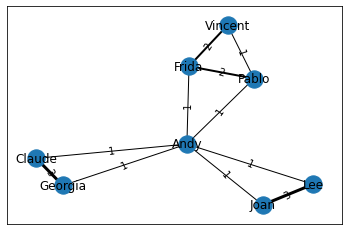

In [28]:
G = answer_three()
plot_graph(G, weight_name="weight")
G.edges(data = True)

In [29]:
assert type(answer_three()) == nx.Graph , "Your return type should be a Graph object"


### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the pearson correlation between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [43]:
def answer_four():
    ### read in nextworks from Q3
    B=answer_three()
    common_movie_df = pd.DataFrame(B.edges(data=True), columns = [0, 1,'#common_movies'])
    print(B.edges(data=True))
    common_movie_df["#common_movies"] = common_movie_df['#common_movies'].map(lambda x: x['weight'])
    #print(common_movie_df)
    
    ### create a duplicate of dataframe, since the df is undirected graph
    common_movie_df2 = common_movie_df[[1, 0, "#common_movies"]]
    common_movie_df2.columns = [0,1,'#common_movies']
    #print(common_movie_df2)
    
    ### concat two dataframe to get an updated frame for both directions
    common_movie_df = pd.concat([common_movie_df,common_movie_df2])
    print('\n', common_movie_df)
    
    ### read in relations as df
    relation_df = pd.read_csv('assets/Employee_Relationships.txt', delimiter="\t",header=None, names= [0,1, "Relations"])
    print('\n', relation_df)
    
    ### left join the relation_df witht he common_book_df to get the final dataframe
    merged = relation_df.merge(common_movie_df, on=[0,1], how='left')
    merged.fillna(0, inplace=True)
    merged.drop_duplicates(inplace=True)
    merged.reset_index(drop = True)
    print('\n', merged)
    
    return merged.corr().Relations[1] 
    ## merge.corr() gives Relation Table.
    ### merged.corr().Relations[1], choose the relation.
answer_four()

[('Joan', 'Lee', {'weight': 3}), ('Joan', 'Andy', {'weight': 1}), ('Frida', 'Vincent', {'weight': 2}), ('Frida', 'Pablo', {'weight': 2}), ('Frida', 'Andy', {'weight': 1}), ('Georgia', 'Andy', {'weight': 1}), ('Georgia', 'Claude', {'weight': 3}), ('Vincent', 'Pablo', {'weight': 1}), ('Pablo', 'Andy', {'weight': 1}), ('Lee', 'Andy', {'weight': 1}), ('Claude', 'Andy', {'weight': 1})]

           0        1  #common_movies
0      Joan      Lee               3
1      Joan     Andy               1
2     Frida  Vincent               2
3     Frida    Pablo               2
4     Frida     Andy               1
5   Georgia     Andy               1
6   Georgia   Claude               3
7   Vincent    Pablo               1
8     Pablo     Andy               1
9       Lee     Andy               1
10   Claude     Andy               1
0       Lee     Joan               3
1      Andy     Joan               1
2   Vincent    Frida               2
3     Pablo    Frida               2
4      Andy    Frida  

0.7883962221733474

In [ ]:
ans_four = answer_four()